In [433]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    #train_errors=train_errors[12:]
    #val_errors = val_errors[12:]
    #train_errors.append(1620.8676)
    #train_errors.append(1640.5466)
    plt.plot(np.sqrt(train_errors), "r-",linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    X_train
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd
pd.set_option('display.max_rows', None)  # 设置显示最大行
def load_res_data(res_path = RES_PATH,file_name="new_feature_0208.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [416]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["FF"])
resource_origin_data_lut=resource_origin_data_lut.drop("LUT",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)



In [417]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 213
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 196 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        196 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      196 non-null    int64  
 3   ARITLSHIFT_VALUE           196 non-null    int64  
 4   ARITRSHIFT                 196 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        196 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      196 non-null    int64  
 7   ARITRSHIFT_VALUE           196 non-null    int64  
 8   AlwaysConstructs           196 non-null    int64  
 9   AssignLHSPortNum           196 non-null    int64  
 10  AssignLHSWidth             196 non-null    int64  
 11  AssignRHSPortNum           196 non-null    int64  
 12  AssignRHSWidth             196 non-null    int64  
 13  AssignStmts                196 non-null    int64  

In [418]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["FF"].sort_values(ascending=False)


FF                           1.000000
FORTIMES                     0.323779
REG                          0.290350
PLUS                         0.261449
CONDITIONALTHEN              0.259708
CONDITIONALIF                0.259708
CONDITIONALELSE              0.259215
NonBlockLeftWidth            0.240758
NonBlockingAssign            0.238064
NonBlockingLeftPortNum       0.237998
NonBlockRightWidth           0.214329
AlwaysConstructs             0.204103
REDAND                       0.201238
CONDITIONALIFWIDTH           0.194170
OUTPUTWIDTH                  0.173564
INPUTWIDTH                   0.161887
REGWIDTH                     0.160117
CASECONDITIONNUM             0.141344
CASECONDITIONWIDTH           0.129702
AssignRHSWidth               0.127570
ARITRSHIFT                   0.127351
MIN                          0.123992
FORBLOCK                     0.121248
ARITRSHIFT_PORT_NUM          0.113272
CASEITEMNUM                  0.110931
WIRENUM                      0.105292
ARITRSHIFT_V

In [419]:
#特征优化
resource_lut = resource_origin_data_lut["FF"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("FF",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [420]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [421]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [428]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42,n_estimators=89,max_depth=7)
forest_reg.fit(X_train_full,y_train_full)
forest_predic = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_predic)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18.154321198333133

In [429]:
from sklearn.metrics import r2_score
r2_score(y_test,forest_predic)

0.7246368687412814

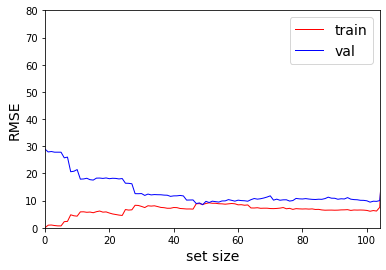

In [440]:
plot_learning_curves(forest_reg, X_train_full, y_train_full)
plt.axis([0, 104, 0, 80])                         # not shown in the book
plt.show()    

In [152]:
#随机森林贡献度分析
feature_importance = forest_reg.feature_importances_
sorted(zip(feature_importance, resource_label), reverse=True)

[(0.37504747414772704, 'NonBlockRightWidth'),
 (0.221327685037266, 'REGWIDTH'),
 (0.13674981591702376, 'NonBlockLeftWidth'),
 (0.033288279895873275, 'PLUS'),
 (0.021985778419186475, 'OUTPUTWIDTH'),
 (0.020543096228209122, 'NonBlockingAssign'),
 (0.020084137782344667, 'OUTPUT'),
 (0.016600039122079045, 'REDAND'),
 (0.014038849153848036, 'CONDITIONALELSE'),
 (0.013520293682186105, 'CONDITIONALTHEN'),
 (0.012750825195171815, 'AssignRHSWidth'),
 (0.010826078608122644, 'REG'),
 (0.008760766817775026, 'NonBlockingRightPortNum'),
 (0.008675911310944744, 'CONDITIONALIF'),
 (0.007019485809901625, 'NonBlockingLeftPortNum'),
 (0.006546752252213471, 'AssignLHSWidth'),
 (0.00647291703208306, 'CONDITIONALIFWIDTH'),
 (0.006303347055811469, 'INPUTWIDTH'),
 (0.005689312949097615, 'AlwaysConstructs'),
 (0.005050516264467556, 'INPUT'),
 (0.003356647811423644, 'BlockAssign_Left_Width'),
 (0.0032897813702090347, 'WIREWIDTH'),
 (0.003140265978587464, 'CASECONDITIONWIDTH'),
 (0.003107576427730948, 'CASEITEMC

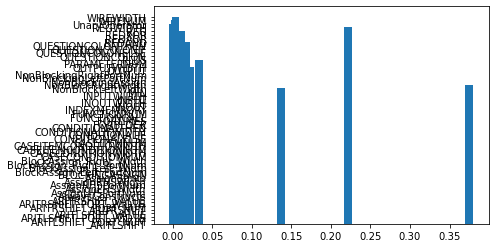

<Figure size 3600x3600 with 0 Axes>

In [176]:
plt.bar(feature_importance, resource_label,width=0.01)
plt.figure(figsize=[50,50])
plt.show()

In [165]:
#随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
forest_rnd_search.fit(X_train_full, y_train_full)

KeyboardInterrupt: 

In [218]:
superpa = []

In [436]:

for i in range(1,50):
    rfc = RandomForestRegressor(random_state=42,n_estimators=i+1,n_jobs=-1) #这里就是进行了200次的随机森林计算，每次的n_estimator设置不一样
    rfc_s = cross_val_score(rfc,X_train_full,y_train_full,cv=10,scoring = 'neg_mean_squared_error').mean()
    superpa.append(rfc_s)
#print(max(superpa),superpa.index(max(superpa)))
#print(superpa)
min_rmse = min(np.sqrt(np.abs(superpa)))
index = superpa.index(min(superpa))
print(min_rmse,index)



18.365561997991776 301


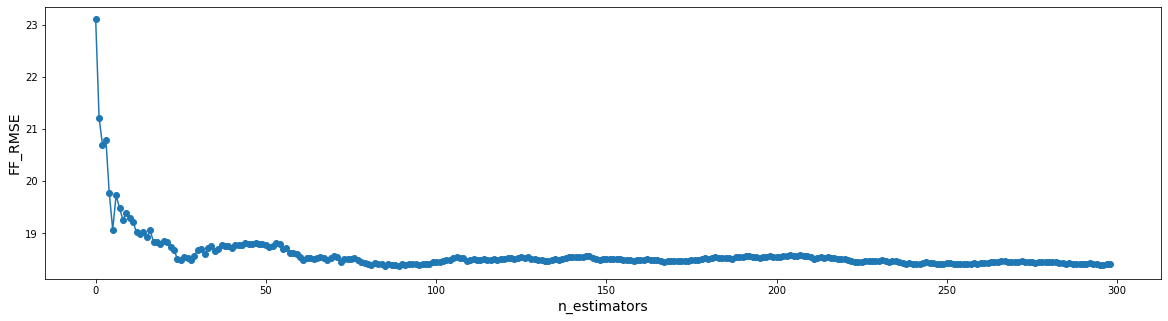

<Figure size 432x288 with 0 Axes>

In [221]:
plt.figure(figsize=[20,5])
plt.plot(range(0,299),np.sqrt(np.abs(superpa)),marker = "o",label='learning_curves')
plt.xlabel("n_estimators", fontsize=14) # not shown
plt.ylabel("FF_RMSE", fontsize=14)              # not shown
plt.show()
plt.savefig("Graph/m_maxdepth.jpg")

In [202]:
test = np.sqrt(np.abs(superpa))
np.where(test==18.365561997991776)

(array([89], dtype=int64),)

In [63]:
#随机森林mse
forest_predict = forest_rnd_search.best_estimator_.predict(X_test)
forest_mse = mean_squared_error(y_test,forest_predict)
forest_mse

5788.630902531727

In [64]:
#随机森林rmse
forest_rmse = np.sqrt(forest_mse)
forest_rmse

76.0830526630716

In [65]:
#随机森林R方评估
from sklearn.metrics import r2_score
r2_score(y_valid,forest_predict)

0.04066686671625985

In [54]:
plot_learning_curves(forest_rnd_search.best_estimator_, X_data_full, resource_lut)
plt.axis([0, 200, 0, 300])                         # not shown in the book
plt.show()    

NameError: name 'forest_rnd_search' is not defined

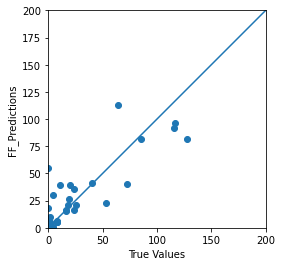

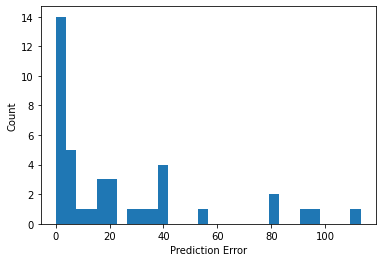

In [435]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_test,forest_predic)
plt.xlabel('True Values')
plt.ylabel('FF_Predictions')
Lims=[0,200]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(forest_predic,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)